In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [132]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [133]:
def prepro(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mask = np.zeros((gray.shape),np.uint8)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

    close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
    div = np.float32(gray)/(close)
    res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
    res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
    plt.imshow(res)
    return res2, res, mask
    

In [134]:
m = cv2.imread("S5.jpeg")
ref = cv2.imread("blank-sudoku-grid.png")
ref_g = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)

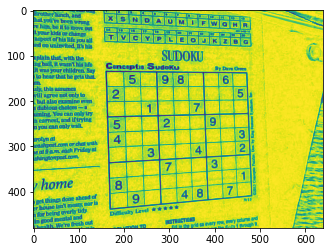

In [135]:
mo, mg, mask = prepro(m)

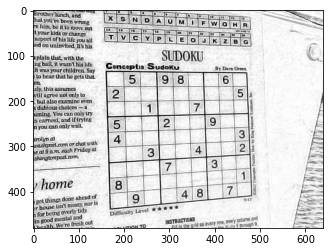

In [136]:
plt.imshow(mo)

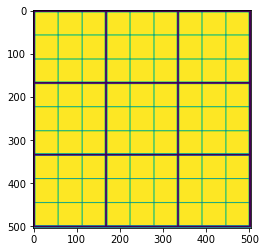

In [137]:
plt.imshow(ref_g)

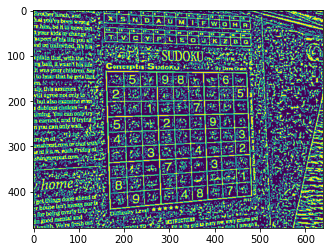

In [138]:
thresh = cv2.adaptiveThreshold(mg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,1,19,2)
contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh)
max_area = 0
best_cnt = None
for cnt in contour:
    area = cv2.contourArea(cnt)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = cnt

t1 = cv2.drawContours(mask,[best_cnt],0,255,-1)

t2 = cv2.drawContours(mask,[best_cnt],0,0,2)


res = cv2.bitwise_and(mg,mask)

In [139]:
res.shape


(480, 640)

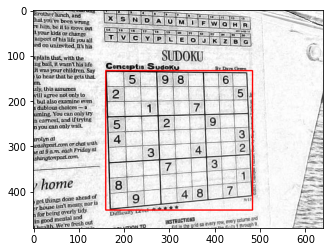

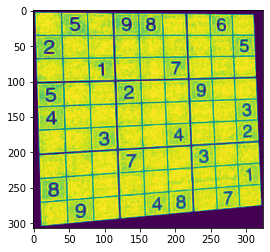

In [144]:
test = mo.copy()
c = max(contour,key= cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)

bd = cv2.rectangle(test,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(bd)
plt.show()
res = res[y:y+h,x:x+w]
plt.imshow(res)

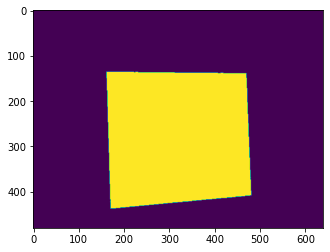

In [145]:
plt.imshow(t2)

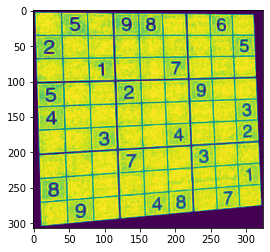

In [146]:
plt.imshow(res)

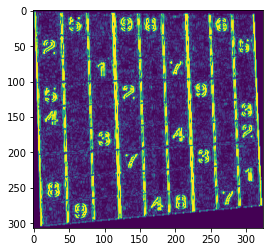

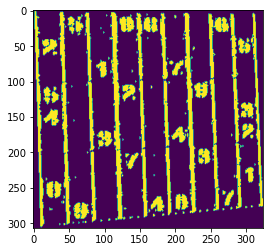

In [147]:
kernelx = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,3))

dx = cv2.Sobel(res,cv2.CV_16S,1,0)
dx = cv2.convertScaleAbs(dx)
cv2.normalize(dx,dx,0,255,cv2.NORM_MINMAX)
plt.imshow(dx)
plt.show()
ret,close = cv2.threshold(dx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernelx,iterations = 1)

contour, hier = cv2.findContours(close,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(close)

In [148]:
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    if h/w > 5:
        t = cv2.drawContours(close,[cnt],0,255,-1)
    else:
        t = cv2.drawContours(close,[cnt],0,0,-1)
    

In [149]:
#close = cv2.morphologyEx(close,cv2.MORPH_CLOSE,None,iterations = 2)
closex = close.copy()

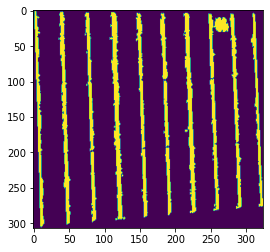

In [150]:
plt.imshow(closex)

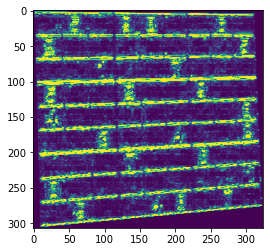

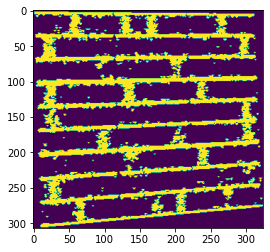

In [152]:
kernely = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,2))
dy = cv2.Sobel(res,cv2.CV_64F,0,2,ksize=3)
dy = cv2.convertScaleAbs(dy)
cv2.normalize(dy,dy,0,255,cv2.NORM_MINMAX)
plt.imshow(dy)
plt.show()

ret,close = cv2.threshold(dy,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernely,iterations=1)
closey = close.copy()
plt.imshow(close)

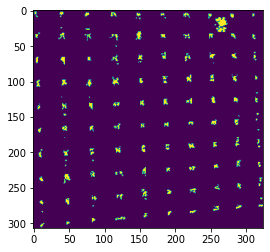

In [153]:
grd = cv2.bitwise_and(closex,closey)
plt.imshow(grd)




